# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [39]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('../Assignment2/pickle/dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [40]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('did', 16),
  ('good', 16),
  ('okay', 15),
  ('gonna', 15),
  ('ive', 15),
  ('baby', 15)],
 

In [41]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, think, tha

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [42]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'school',
 'jokes',
 'yeah',
 'did',
 'good',
 'okay',
 'gonna',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'think',
 'love',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'said',
 'people',
 'fucki

In [43]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

#### If more than half of the comedians have it as a top word, exclude it from the list


In [44]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10] 
add_stop_words

['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre']

In [45]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('../Assignment2/pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words=list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [47]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


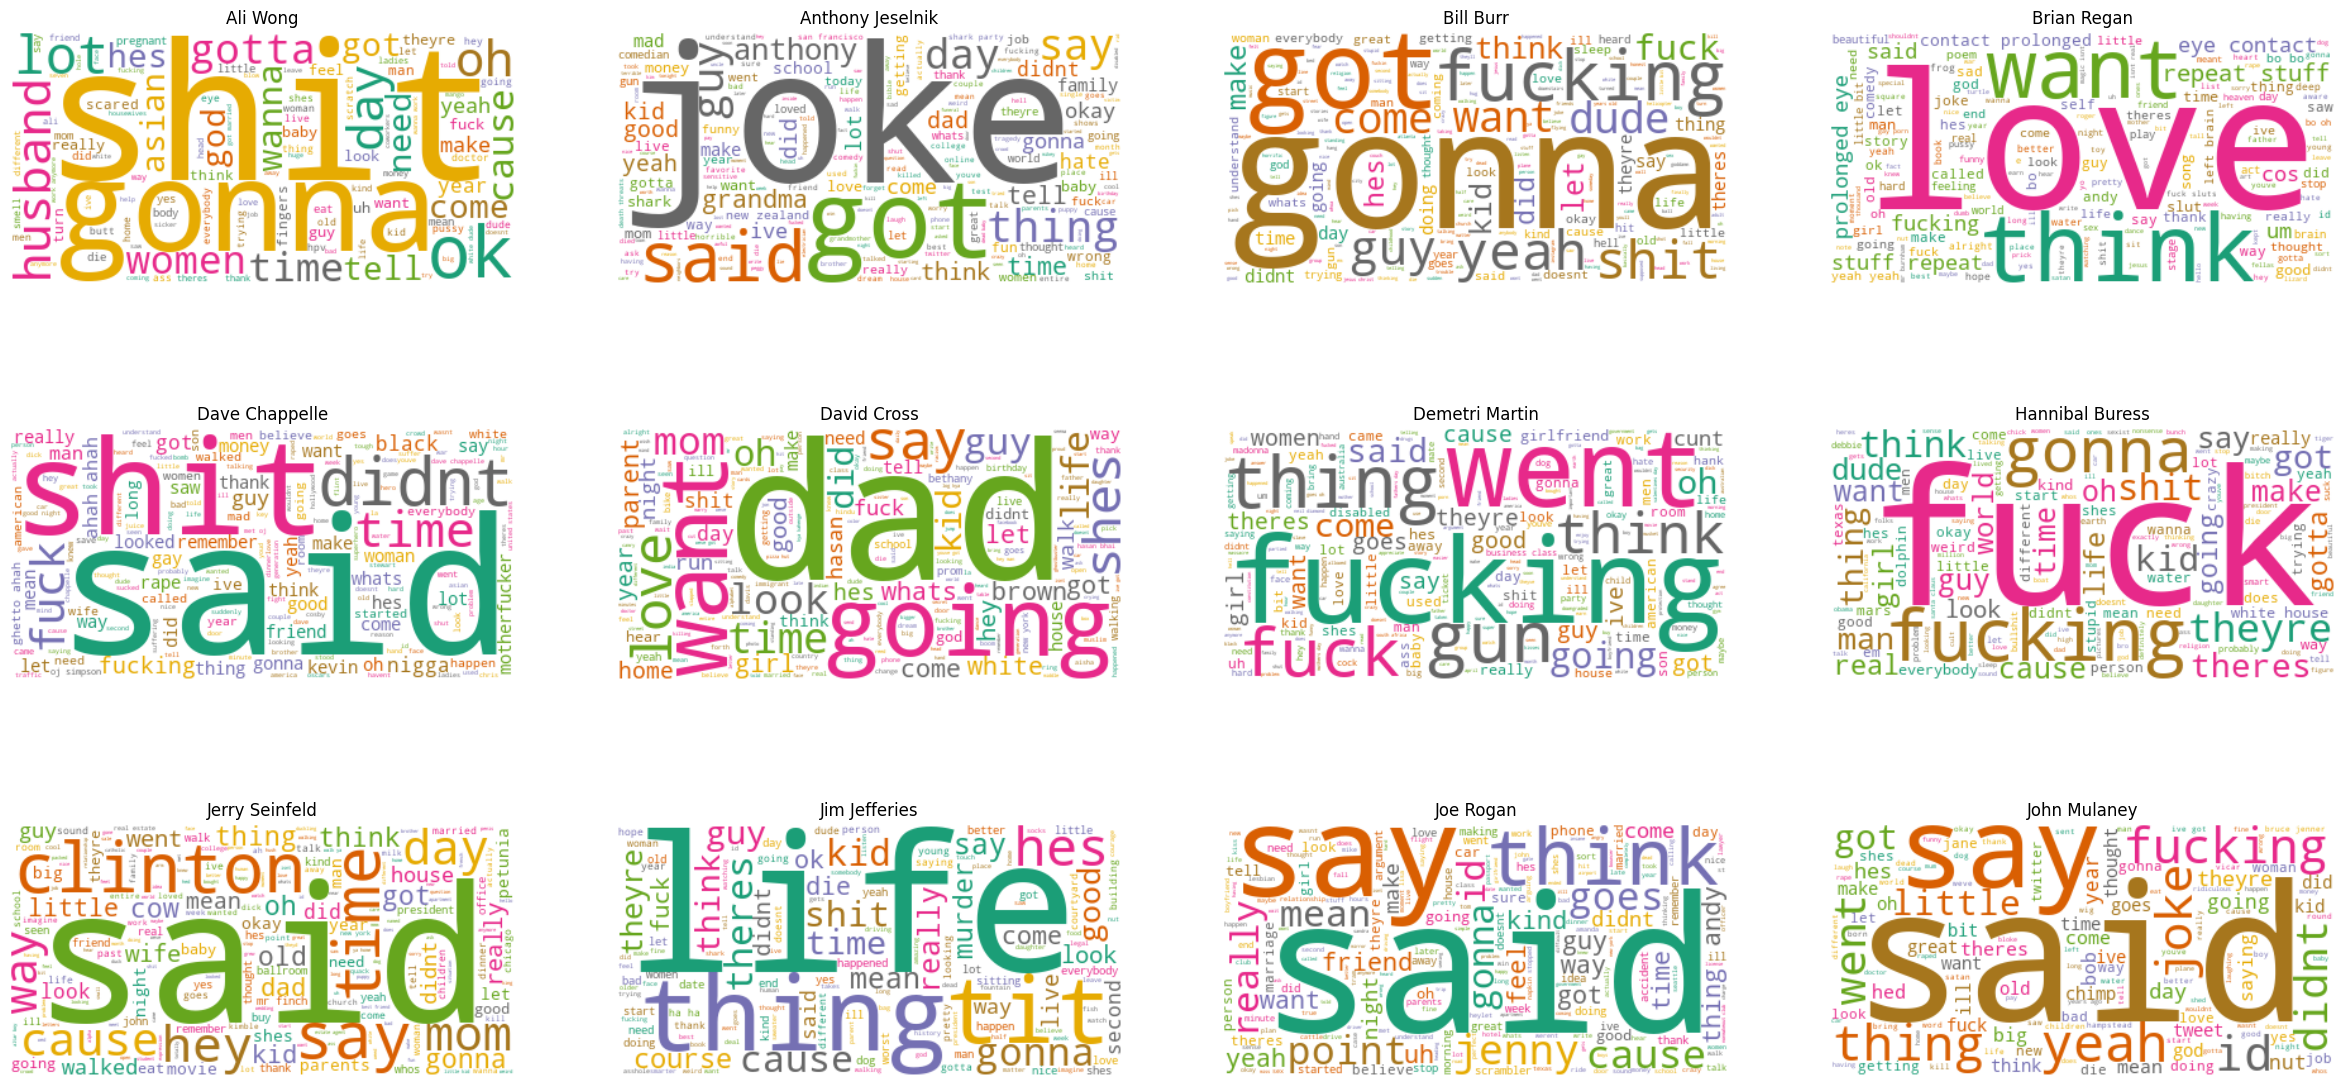

In [49]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 30]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Brian Regan', 'Dave Chappelle', 'David Cross', 'Demetri Martin', 
              'Hannibal Buress', 'Jerry Seinfeld', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Kyle Kinane', 'Louis C.K.', 
              'Mike Birbiglia', 'Patton Oswalt', 'Pete Holmes', 'Richard Pryors', 'Ricky Gervais', 'Rory Scovel']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(6, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

#### Your observations
1. Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
2. A lot of people use the F-word. Let's dig into that later.

#### Other observations
* Anthony talks about himself and his grandma a lot.
* Jim talks about Clinton alot.
* Mike and Demitri talks about babies alot.
* The word "said" is a common word to use for many of the above comedians. 

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [26]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,984
9,Jim Jefferies,1098
3,Brian Regan,1272
6,Demetri Martin,1313
0,Ali Wong,1341
8,Jerry Seinfeld,1391
4,Dave Chappelle,1404
7,Hannibal Buress,1435
10,Joe Rogan,1494
5,David Cross,1559


In [50]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 58, 67, 56, 62, 67, 60, 76, 63, 62, 63, 61, 75, 58, 61, 78, 78, 61]

run_times = run_times[:12]
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute,unique_wpm
9,Jim Jefferies,1098,3332,76,43.842105,14.447368
1,Anthony Jeselnik,984,2905,59,49.237288,16.677966
3,Brian Regan,1272,3165,58,54.568966,21.931034
0,Ali Wong,1341,3283,60,54.716667,22.350000
4,Dave Chappelle,1404,4094,67,61.104478,20.955224
8,Jerry Seinfeld,1391,4001,60,66.683333,23.183333
7,Hannibal Buress,1435,4579,67,68.343284,21.417910
2,Bill Burr,1633,5535,80,69.187500,20.412500
10,Joe Rogan,1494,4741,63,75.253968,23.714286
6,Demetri Martin,1313,4764,62,76.838710,21.177419


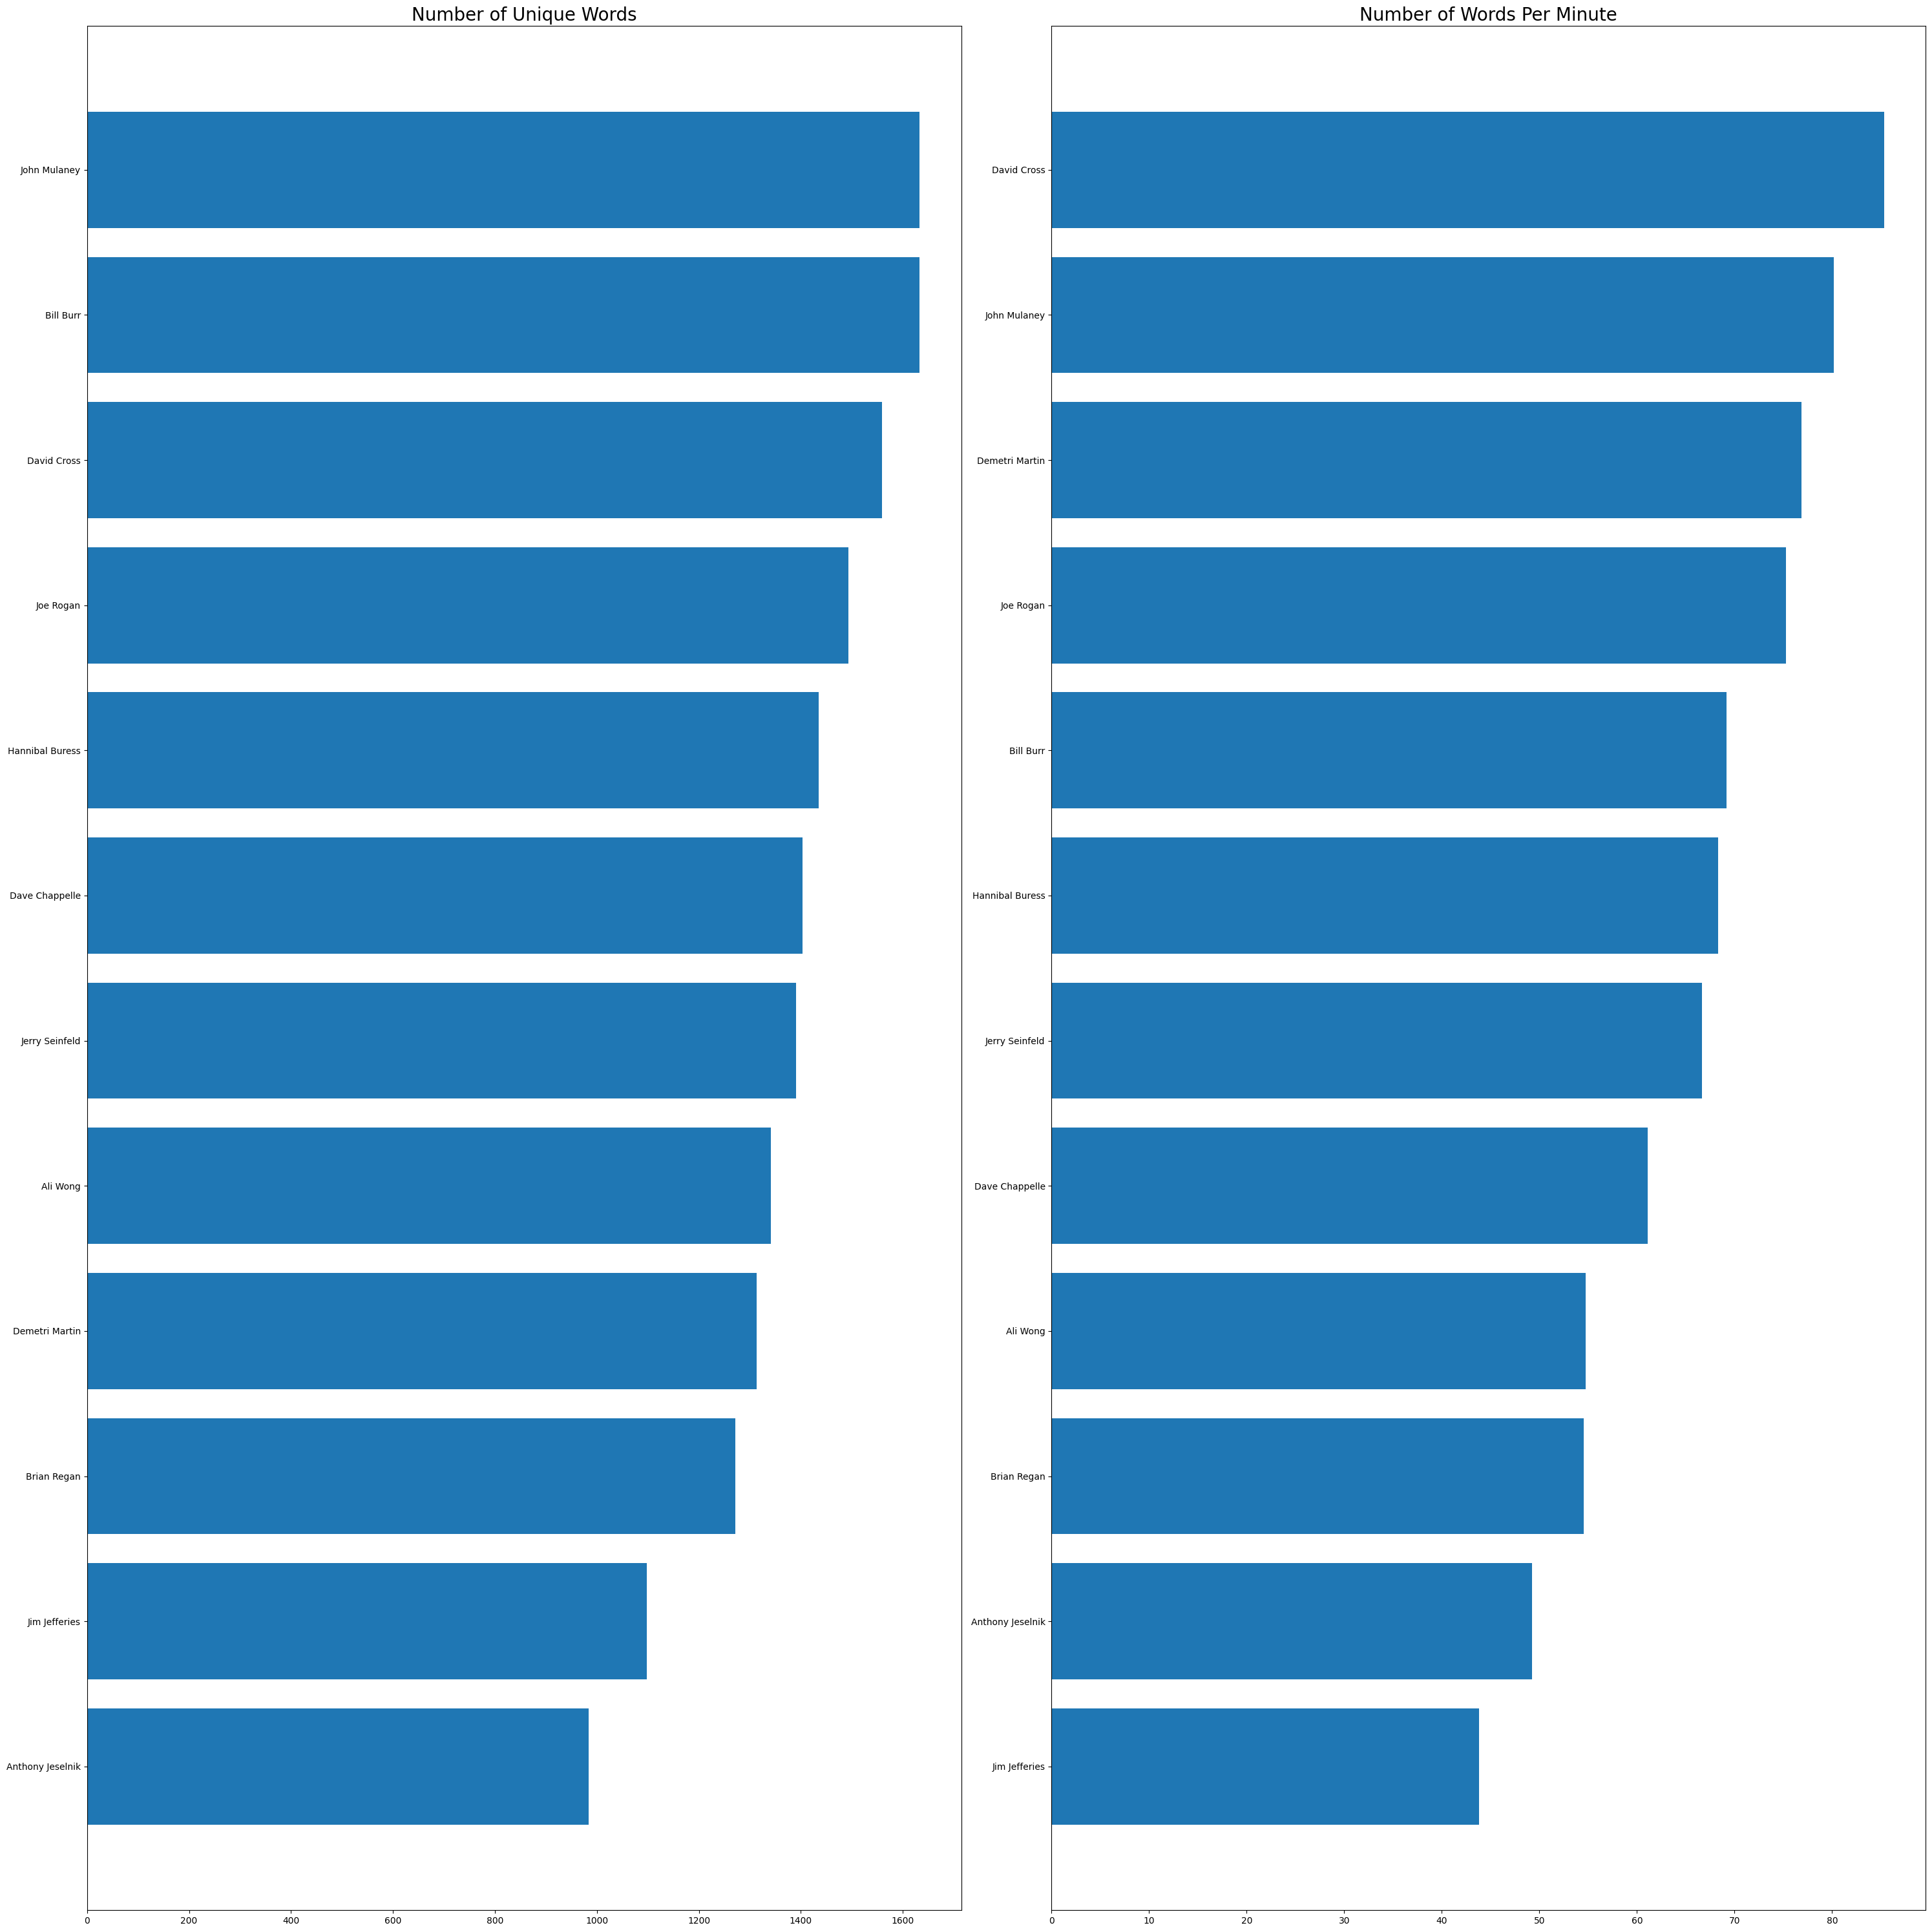

In [51]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [52]:
data_words['unique_wpm']=data_words['unique_words']/data_words['run_times']
data_wpm_sort=data_words.sort_values(by='unique_wpm')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute,unique_wpm
9,Jim Jefferies,1098,3332,76,43.842105,14.447368
1,Anthony Jeselnik,984,2905,59,49.237288,16.677966
2,Bill Burr,1633,5535,80,69.187500,20.412500
4,Dave Chappelle,1404,4094,67,61.104478,20.955224
6,Demetri Martin,1313,4764,62,76.838710,21.177419
7,Hannibal Buress,1435,4579,67,68.343284,21.417910
3,Brian Regan,1272,3165,58,54.568966,21.931034
0,Ali Wong,1341,3283,60,54.716667,22.350000
8,Jerry Seinfeld,1391,4001,60,66.683333,23.183333
10,Joe Rogan,1494,4741,63,75.253968,23.714286


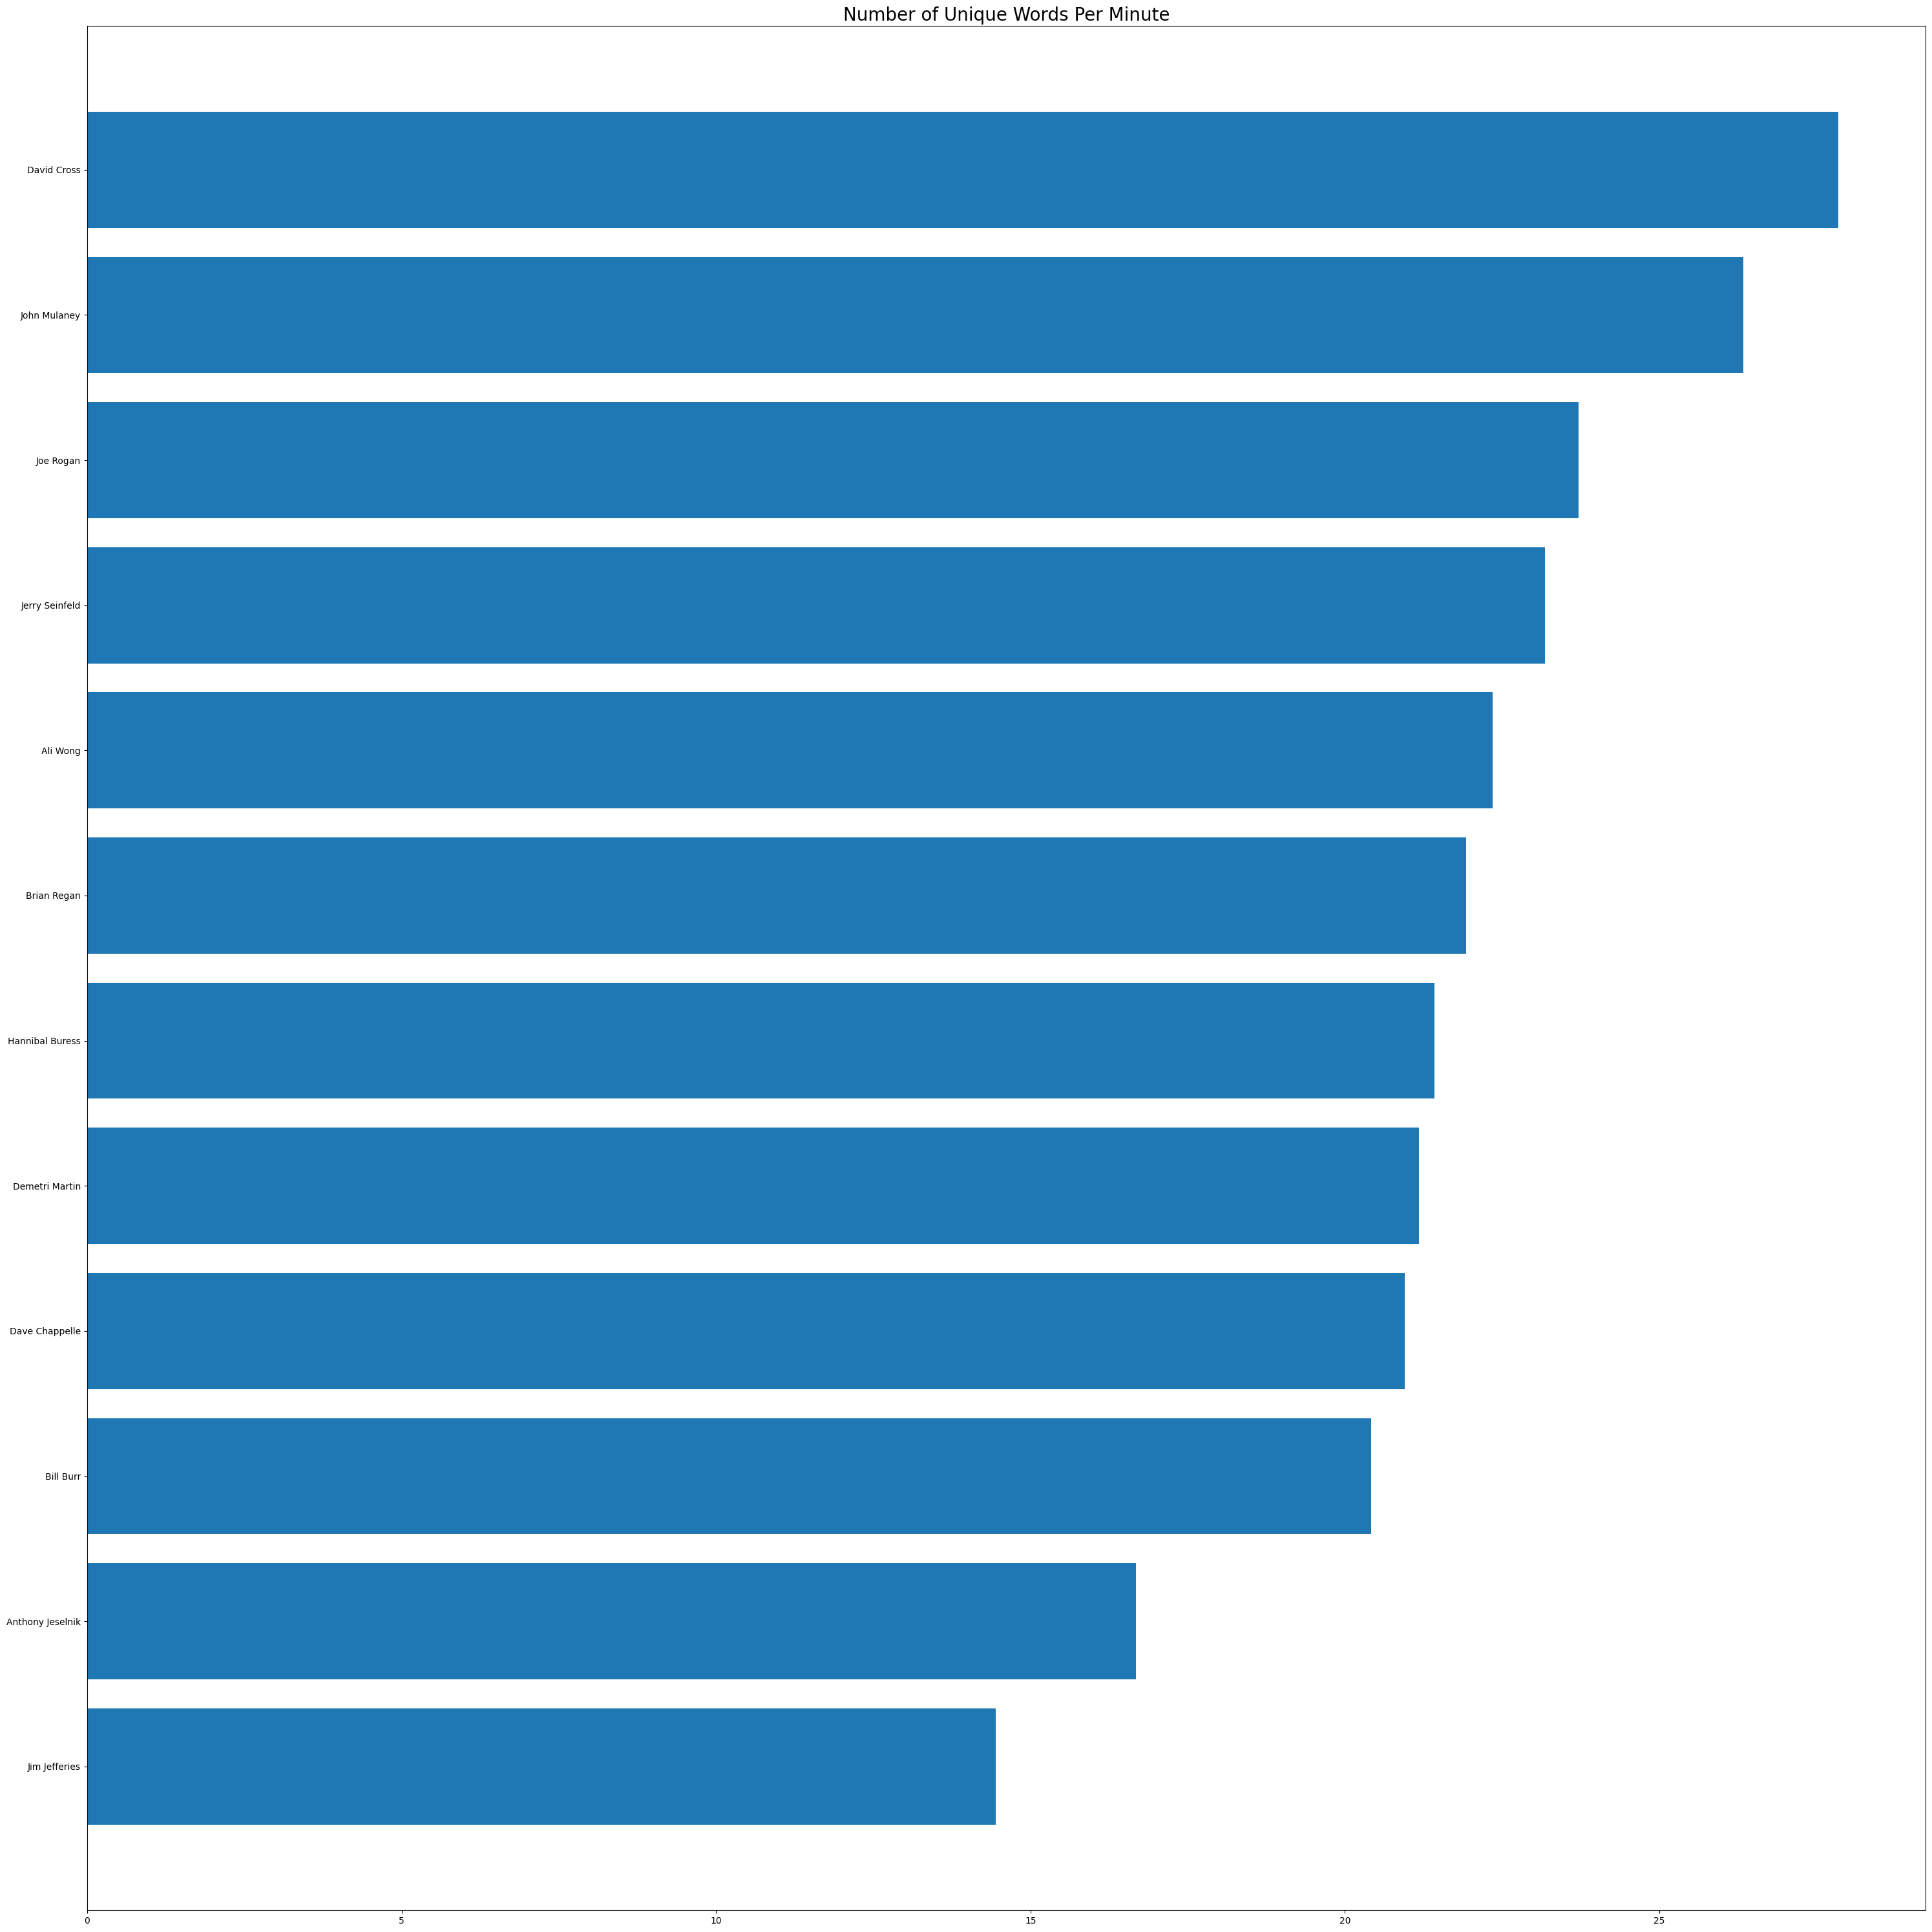

In [53]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.barh(y_pos, data_wpm_sort.unique_wpm, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Unique Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

**MY FINDINGS**
* **Vocabulary**
   * Dave Chappelle and Pete Holmes use a lot of words in their comedy.
   * Patton Oswalt uses least amount of words which is significantly less from others.
   * Joe Regan and Anthony Jeselnik have a smaller vocabulary.


* **Talking Speed**
   * Dave Chappelle and Jerry Seinfield talk fast.
   * Patton Oswalt talks really slow.
     
* **Overall**
   * Dave Chappelle speaks the most and is the fastest among the above.
   * Patton Oswalt speaks really less and is the slowest amongst them all.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [54]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [64]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


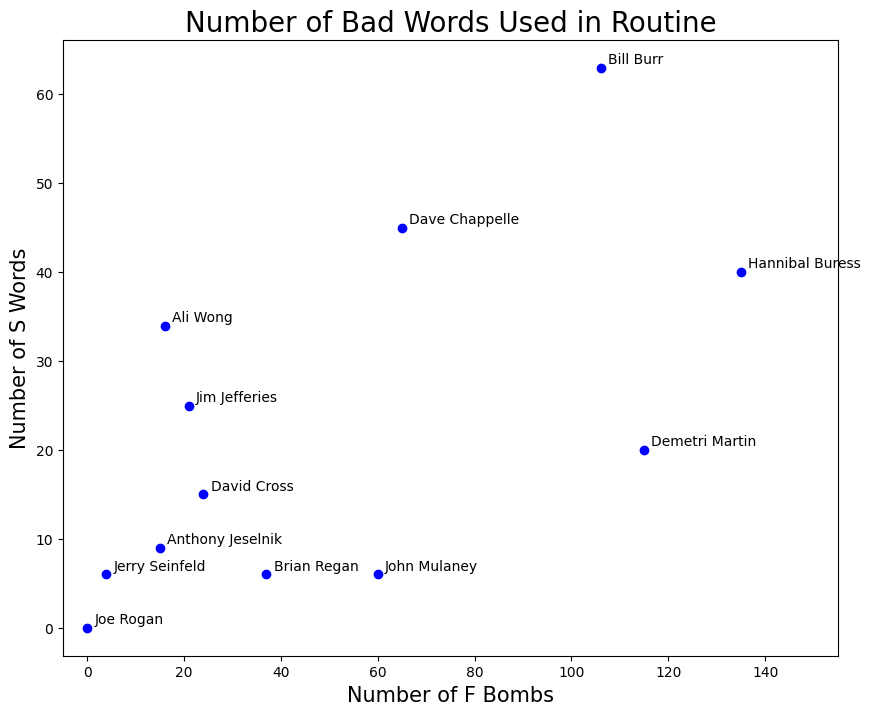

In [65]:
# create a scatter plot of your findings
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

**MY FINDINGS**
* Hannibal Buress, Bill Burr,Jim Jefferies use huge amount of swear words.
* If number of s-words and f-words are kept zero then we can differentiate between most of the comedians easily.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [66]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['gay', 'guy', 'woman','lady','fag']]
data_profanity = pd.concat([data_bad_words.guy + data_bad_words.woman+ data_bad_words.lady, data_bad_words.gay+data_bad_words.fag], axis=1)
data_profanity.columns = ['mf', 'gay']
data_profanity

,mf,gay
ali,11,1
anthony,7,0
bill,47,6
bo,5,8
dave,28,20
hasan,8,0
jim,30,1
joe,21,1
john,17,2
louis,30,2


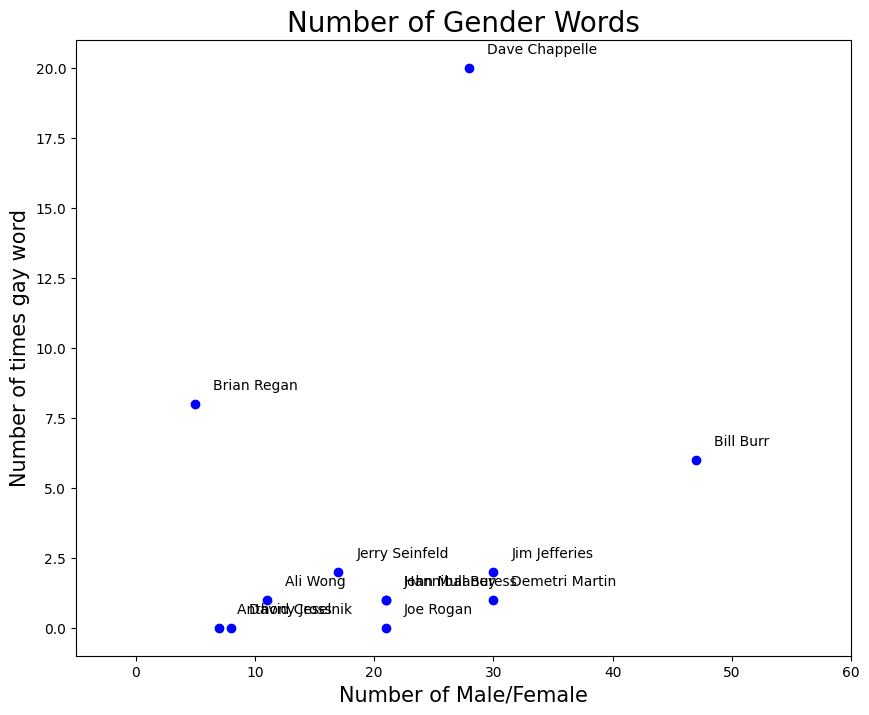

In [67]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.mf.loc[comedian]
    y = data_profanity.gay.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 60) 
    
plt.title('Number of Gender Words', fontsize=20)
plt.xlabel('Number of Male/Female', fontsize=15)
plt.ylabel('Number of times gay word', fontsize=15)

plt.show()

In [68]:
data_bad_words = data.transpose()[['porn', 'child','baby','kid']]
data_profanity = pd.concat([data_bad_words.porn , data_bad_words.child+data_bad_words.baby+data_bad_words.kid], axis=1)
data_profanity.columns = ['adult', 'kid']
data_profanity

,adult,kid
ali,2,17
anthony,0,27
bill,1,25
bo,5,6
dave,0,0
hasan,0,15
jim,7,33
joe,0,20
john,0,26
louis,0,14


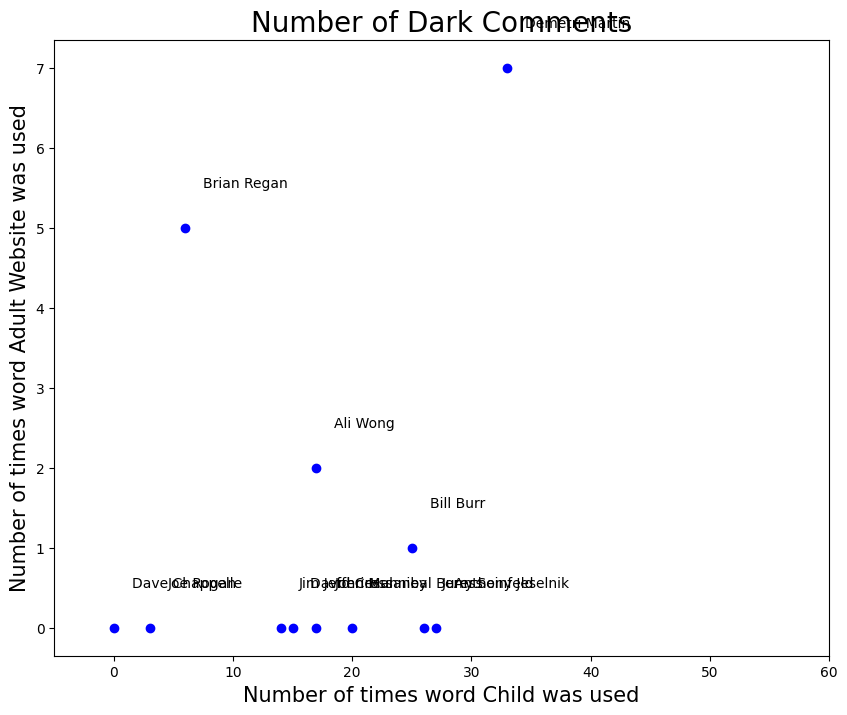

In [69]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.kid.loc[comedian]
    y = data_profanity.adult.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 60) 
    
plt.title('Number of Dark Comments', fontsize=20)
plt.xlabel('Number of times word Child was used', fontsize=15)
plt.ylabel('Number of times word Adult Website was used', fontsize=15)

plt.show()

In [70]:
data_bad_words = data.transpose()[['religion','jew','politics','politician','christian','president']]
data_profanity = pd.concat([data_bad_words.religion+data_bad_words.christian+data_bad_words.jew , data_bad_words.politics+data_bad_words.politician+data_bad_words.president], axis=1)
data_profanity.columns = ['religion', 'politics']
data_profanity

,religion,politics
ali,0,0
anthony,2,0
bill,12,1
bo,1,0
dave,0,1
hasan,0,3
jim,0,0
joe,8,8
john,2,13
louis,0,4


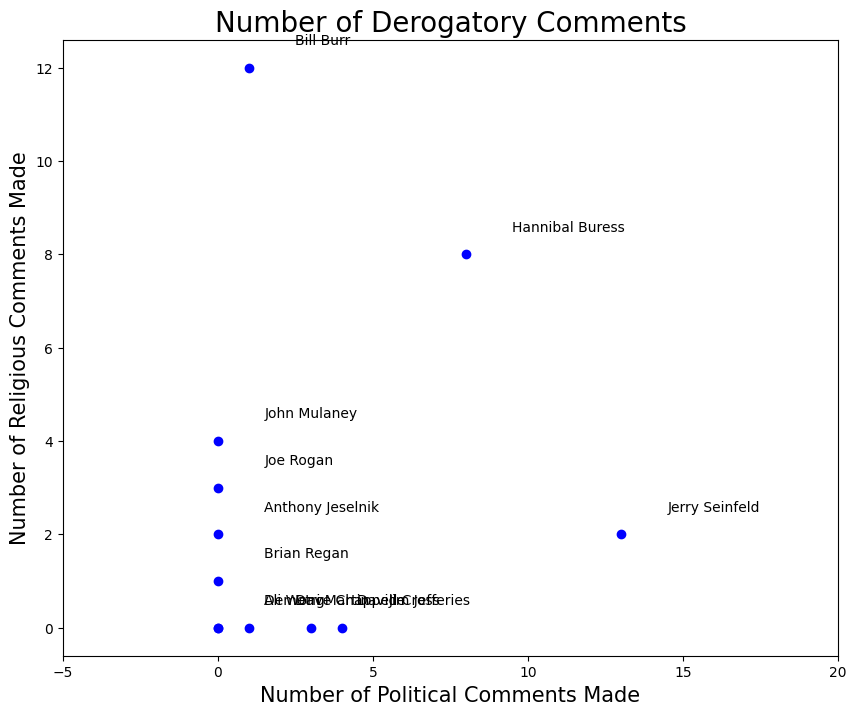

In [71]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    y = data_profanity.religion.loc[comedian]
    x = data_profanity.politics.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 20) 
    
plt.title('Number of Derogatory Comments', fontsize=20)
plt.ylabel('Number of Religious Comments Made', fontsize=15)
plt.xlabel('Number of Political Comments Made', fontsize=15)

plt.show()